# Simple Linear Regression using Scikit Learn

### Simple Linear Regression Equation



### y = a0 + a1*X                                

In [44]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
#Read Student Grades .csv file and divide the data into dependent and independent variables.
data = pd.read_csv('Student_Grades_Data.csv')
data.head()

,Time_to_Study,Grades
0,1,1.5
1,5,2.7
2,7,3.1
3,3,2.1
4,2,1.8


In [46]:
data.shape

(50, 2)

In [47]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [48]:
X

array([[ 1],
       [ 5],
       [ 7],
       [ 3],
       [ 2],
       [ 9],
       [ 6],
       [12],
       [11],
       [ 2],
       [ 4],
       [ 8],
       [13],
       [ 9],
       [14],
       [10],
       [ 6],
       [12],
       [ 1],
       [ 4],
       [14],
       [10],
       [11],
       [ 4],
       [ 5],
       [ 8],
       [ 1],
       [ 2],
       [ 3],
       [ 7],
       [ 8],
       [14],
       [ 7],
       [ 8],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [ 8],
       [ 2]], dtype=int64)

In [49]:
y

array([1.5, 2.7, 3.1, 2.1, 1.8, 3.9, 2.9, 4.5, 4.3, 1.8, 2.4, 3.5, 4.8,
       3.9, 5. , 4.1, 2.9, 4.5, 1.5, 2.4, 5. , 4.1, 4.3, 2.4, 2.7, 3.5,
       1.5, 1.8, 2.1, 3.1, 3.5, 5. , 3.1, 3.5, 1.5, 1.8, 2.1, 2.4, 2.7,
       2.9, 3.1, 3.5, 3.9, 4.1, 4.3, 4.5, 4.8, 5. , 3.5, 1.8])

In [50]:
#Split the data into training and test datasets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [51]:
y_test

array([2.1, 3.5, 2.4, 3.5, 3.1, 1.8, 2.7, 5. , 4.3, 1.8, 3.5, 1.8, 1.5,
       1.5, 1.5])

In [52]:
#Fit the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
#Print the 
print(f'a0 = {LinReg.intercept_}')
print(f'a1 = {LinReg.coef_}')

a0 = 1.3045041899441348
a1 = [0.2704027]


In [54]:
#Predicted grade scores from test dataset
y_predict = LinReg.predict(X_test)
y_predict

array([2.11571229, 3.46772579, 2.38611499, 3.46772579, 3.19732309,
       1.84530959, 2.65651769, 5.09014199, 4.27893389, 1.84530959,
       3.46772579, 1.84530959, 1.57490689, 1.57490689, 1.57490689])

In [55]:
#Actual grade scores from test dataset
y_test

array([2.1, 3.5, 2.4, 3.5, 3.1, 1.8, 2.7, 5. , 4.3, 1.8, 3.5, 1.8, 1.5,
       1.5, 1.5])

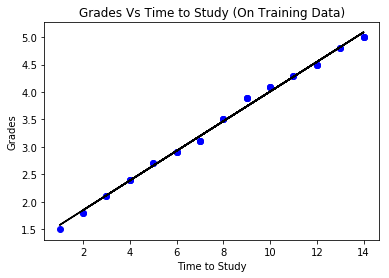

In [56]:
#Grades Vs Time to Study visualization on Training Data
plt.scatter(X_train, y_train, color='Blue')
plt.plot(X_train, LinReg.predict(X_train), color='Black')
plt.title('Grades Vs Time to Study (On Training Data)')
plt.xlabel('Time to Study')
plt.ylabel('Grades')
plt.show()

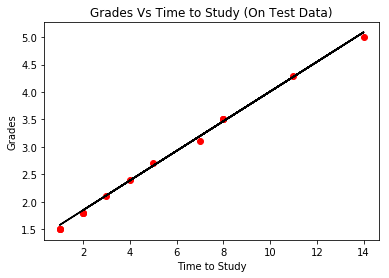

In [57]:
#Grades Vs Time to Study visualization on Test Data
plt.scatter(X_test, y_test, color='Red')
plt.plot(X_train, LinReg.predict(X_train), color='Black')
plt.title('Grades Vs Time to Study (On Test Data)')
plt.xlabel('Time to Study')
plt.ylabel('Grades')
plt.show()

In [66]:
#Predicting Grade of a student when he studied for 10 Hrs. Example of how to pass an external value,
#Independent of Test or Training Dataset

Predict_Grade = LinReg.predict(10)
Predict_Grade

array([4.00853119])

In [59]:
#Model Evaluation using R-Square
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict)
print('R-Square Error:', r_square)

R-Square Error: 0.997283498148368


In [60]:
#For Illustration Purpose Only. 
#Considering Multiple Linear Equation with two Variables : grade = a0 + a1*time_to_study + a2*class_participation
#Model Evaluation using Adjusted R-Square. 
# Here n = no. of observations and p = no. of independent variables

n = 50
p = 2
Adj_r_square = 1-(1-r_square)*(n-1)/(n-p-1)
print('Adjusted R-Square Error:', Adj_r_square)

Adjusted R-Square Error: 0.9971679023248944


In [61]:
#Model Evaluation using Mean Square Error (MSE)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))

Mean Squared Error: 0.003099226779173007


In [62]:
#Model Evaluation using Root Mean Square Error (RMSE)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Root Mean Squared Error: 0.055670699467251235


In [63]:
#Model Evaluation using Mean Absolute Error (MAE)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))

Mean Absolute Error: 0.0492721911855992
